In [6]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import umap
import numpy as np

from models import *
from data import load_mnist

In [7]:
dataloader, sub0, sub1 = load_mnist(256)
dim = sub0.shape[0]

In [8]:
base = Autoencoder(dim)
base.load_state_dict(torch.load('./models/base.pth'))

<All keys matched successfully>

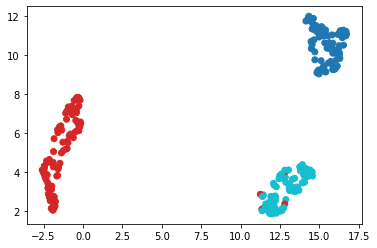

In [9]:
for d, l in dataloader: break
img = d.view(d.size(0), -1)

img0 = img[:, sub0]
img0 = Variable(img0)#.cuda()
embedding0 = base.encoder(img0).cpu().detach().numpy()

mapped = umap.UMAP().fit_transform(embedding0)
plt.scatter(*mapped.T, c=l, cmap=plt.cm.tab10)
None

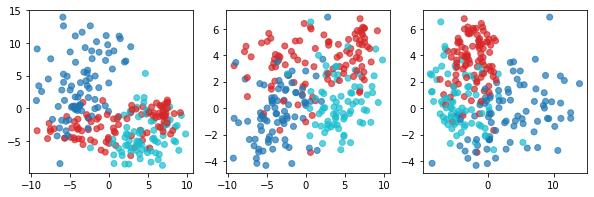

In [10]:
fig, axs = plt.subplots(figsize=(10, 3), ncols=3)
for j, d in enumerate([(0, 1), (0, 2), (1, 2)]):
    axs[j].scatter(*embedding0[:, d].T, alpha=.7, c=l, cmap=plt.cm.tab10)

In [15]:
matryoshka = Matryoshka(dim)
matryoshka.load_state_dict(torch.load('./models/matryoshka.pth'))
jian = Jian(dim)
jian.load_state_dict(torch.load('./models/jian.pth'))

<All keys matched successfully>

In [28]:
img1 = img[:, sub1]
img1 = Variable(img1)#.cuda()

inter = matryoshka.encoder0(img1)
embedding1_matryoshka = matryoshka.encoder(inter).cpu().detach().numpy()

embedding1_jian = jian.encoder(img1).cpu().detach().numpy()

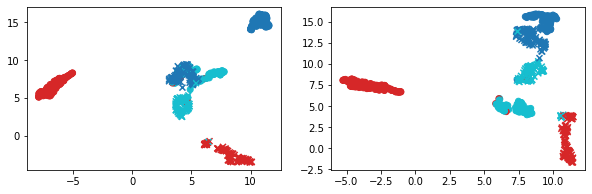

In [29]:
fig, axs = plt.subplots(figsize=(10, 3), ncols=2)
for ax, embedding1 in zip(axs, [embedding1_matryoshka, embedding1_jian]):
    embedding = umap.UMAP().fit_transform(np.r_[embedding0, embedding1])
    # embedding = np.r_[embedding0, embedding1][:, [1, 2]]
    ax.scatter(*embedding[:embedding0.shape[0]].T, c=l, cmap=plt.cm.tab10)
    ax.scatter(*embedding[embedding0.shape[0]:].T, marker='x', c=l, cmap=plt.cm.tab10)
None

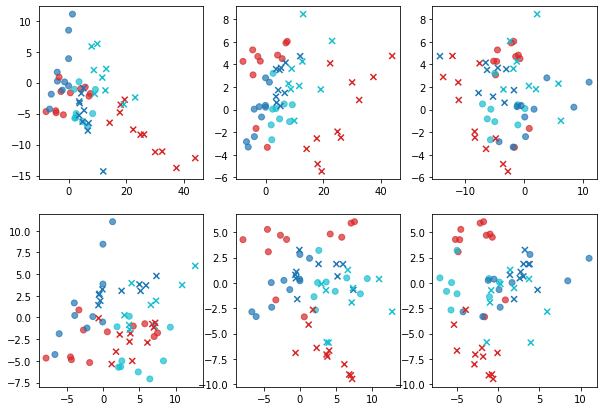

In [30]:
fig, axs = plt.subplots(figsize=(10, 7), nrows=2, ncols=3)
for i, embedding1 in enumerate([embedding1_matryoshka, embedding1_jian]):
    embedding = np.r_[embedding0, embedding1][:, [0, 1]]
    for j, d in enumerate([(0, 1), (0, 2), (1, 2)]):
        axs[i, j].scatter(*embedding0[:30, d].T, alpha=.7, c=l[:30], cmap=plt.cm.tab10)
        axs[i, j].scatter(*embedding1[:30, d].T, marker='x', c=l[:30], cmap=plt.cm.tab10)


Map features from modality 1 to 2.

In [22]:
decoded = np.empty((img0.shape[0], img.shape[1]))
decoded[:, sub0] = img0.numpy()
decoded[:, sub1] = jian.decoder0(img0).detach().numpy()
decoded = decoded.reshape(-1, 28, 28)

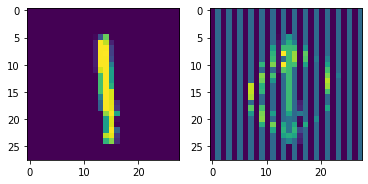

In [27]:
fig, axs = plt.subplots(ncols=2)
i = 4
axs[0].imshow(img[i].reshape(28, 28).numpy())
axs[1].imshow(decoded[i])
None